In [1]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np

from mixtures import UnivariateMixture, BivariateMixture, PomegranateUnivariateMixture

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Define ground truth model

In [2]:
mu = [1., 2.]
sigma = 2.
weights = [.5, .5]
generating_model = UnivariateMixture.from_parameters(mu, sigma, weights)

Text(0.5,1,'Ground truth')

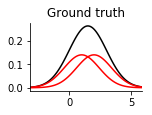

In [3]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot(ax=ax, log=True, pdf_color='k', component_color='r')
ax.set_title ('Ground truth')

# Generate sample

In [16]:
N = 1000
m = 10
sample = generating_model.multi_sample(N, m=m)

### Bivariate model

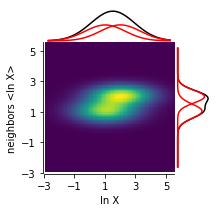

In [17]:
bivariate_model = BivariateMixture.from_sample(sample, n=2)
fig = bivariate_model.plot()

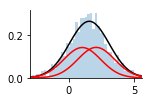

In [18]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
bivariate_model[0].plot(log=True, ax=ax)

### Univariate model

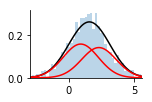

In [19]:
univariate_model = UnivariateMixture.from_sample(sample[:, 0], n=2)

fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
univariate_model.plot(ax=ax, log=True)

Text(0.5,1,'Univariate fit')

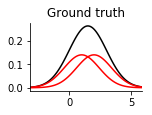

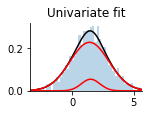

In [21]:
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot(ax=ax, log=True, pdf_color='k', component_color='r')
ax.set_title ('Ground truth')


sample = generating_model.sample(N)
univariate_model = UnivariateMixture.from_sample(sample[:, 0], n=2)
    
fig, ax = plt.subplots(figsize=(2., 1.25))
generating_model.plot_data(ax=ax, log=True, alpha=0.3)
univariate_model.plot(ax=ax, log=True)
ax.set_title('Univariate fit')

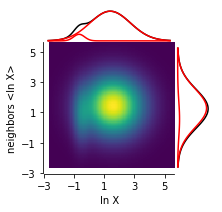

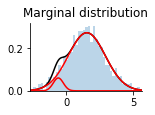

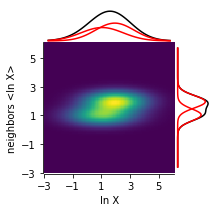

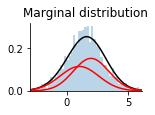

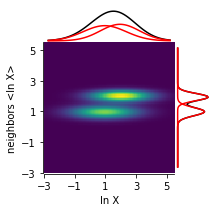

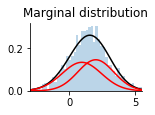

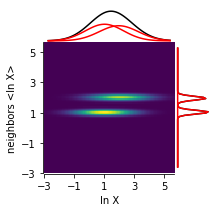

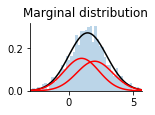

In [22]:
for m in [1, 10, 25, 100]:

    sample = generating_model.multi_sample(N, m=m)

    bivariate_model = BivariateMixture.from_sample(sample, n=2)
        
    fig = bivariate_model.plot()

    fig, ax = plt.subplots(figsize=(2., 1.25))
    generating_model.plot_data(ax=ax, log=True, alpha=0.3)
    bivariate_model[0].plot(log=True, ax=ax)
    ax.set_title('Marginal distribution')    

In [23]:
def figure(func):
    def wrapper(*args, ax=None, **kwargs):
        if ax is None:
            fig, ax = plt.subplots(figsize=(2., 1.25))
        func(*args, ax=ax, **kwargs)
    return wrapper

In [25]:
def plot(x, y, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(x,y, **kwargs)
    
@my_decorator
def plot2(x, y, ax=None, **kwargs):
    ax.plot(x,y, **kwargs)

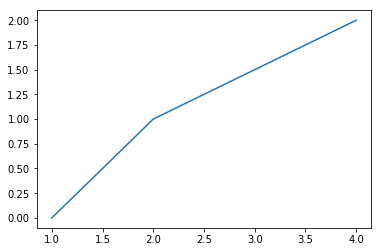

In [26]:
plot([1,2,4], [0,1,2])

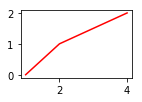

In [31]:
plot2([1,2,4], [0,1,2],  color='r')